Local Interpretability and Explanation of Model Predictions Using LIME.

In [ ]:
pip install lime

In [ ]:
# Step 1: Start the program (No specific code required for this in a notebook)

# Step 2: Import required libraries
import lime
import lime.lime_tabular
import sklearn
import sklearn.ensemble
import sklearn.model_selection
import sklearn.datasets
import matplotlib.pyplot as plt

 

In [ ]:
# Step 3: Load a dataset (e.g., Iris dataset)
iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

 

In [ ]:
# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.80, random_state=42)

 

In [ ]:
# Step 5: Train a black-box model (e.g., Random Forest)
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

 

RandomForestClassifier(random_state=42)

In [ ]:
# Step 6: Initialize a LimeTabularExplainer with training data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, mode='classification')

 

In [ ]:
# Step 7: Choose two test instances
instance_idx1 = 0 # You can choose any index from the test set
instance_idx2 = 1 # Choose another index

instance1 = X_test[instance_idx1]
instance2 = X_test[instance_idx2]

 

In [ ]:
# Step 8: Generate explanations for both instances using explainer.explain_instance()
# Get the predicted class for each instance
predicted_class1 = rf.predict([instance1])[0]
predicted_class2 = rf.predict([instance2])[0]

explanation1 = explainer.explain_instance(instance1, rf.predict_proba, num_features=len(feature_names), top_labels=len(class_names))
explanation2 = explainer.explain_instance(instance2, rf.predict_proba, num_features=len(feature_names), top_labels=len(class_names))

 

Explanation for instance 0:
Predicted class: versicolor
  4.25 < petal length (cm) <= 5.10: 0.2172
  0.30 < petal width (cm) <= 1.30: 0.1856
  sepal width (cm) <= 2.80: -0.0205
  5.75 < sepal length (cm) <= 6.40: 0.0155

Explanation for instance 1:
Predicted class: setosa
  petal width (cm) <= 0.30: 0.4271
  1.50 < petal length (cm) <= 4.25: -0.0374
  5.10 < sepal length (cm) <= 5.75: 0.0242
  sepal width (cm) > 3.40: 0.0184


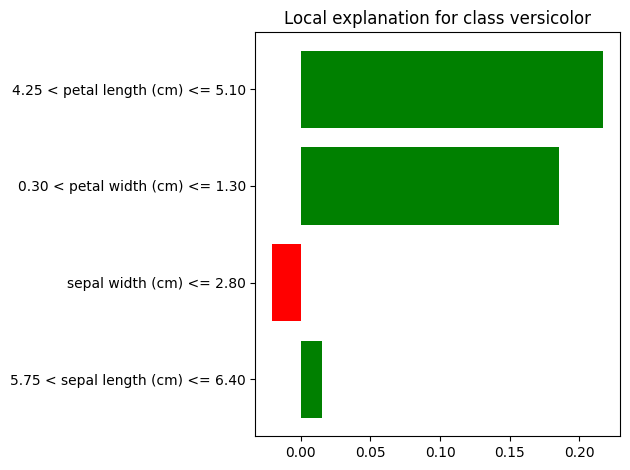

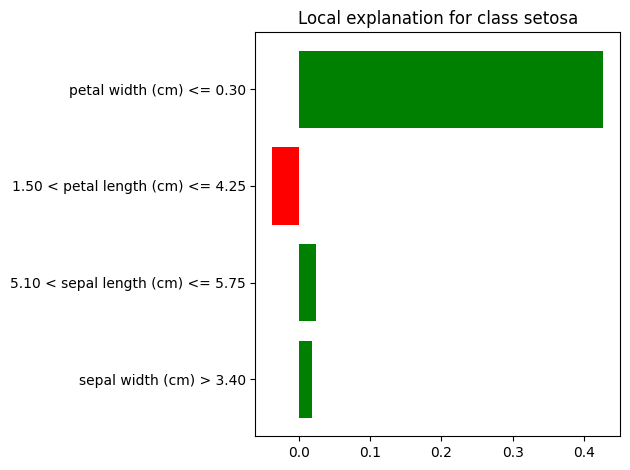

In [ ]:
# Step 9: Visualize feature importance for each prediction
print(f"Explanation for instance {instance_idx1}:")
print(f"Predicted class: {class_names[predicted_class1]}")
# Use the predicted class label to get the explanation list, converting to int
exp1_list = explanation1.as_list(label=int(predicted_class1))
for feature, weight in exp1_list:
	print(f"  {feature}: {weight:.4f}")

print(f"\nExplanation for instance {instance_idx2}:")
print(f"Predicted class: {class_names[predicted_class2]}")
# Use the predicted class label to get the explanation list, converting to int
exp2_list = explanation2.as_list(label=int(predicted_class2))
for feature, weight in exp2_list:
	print(f"  {feature}: {weight:.4f}")

# Visualize using matplotlib instead of show_in_notebook
fig1 = explanation1.as_pyplot_figure(label=int(predicted_class1))
plt.tight_layout()
plt.show()

fig2 = explanation2.as_pyplot_figure(label=int(predicted_class2))
plt.tight_layout()
plt.show()

 

In [ ]:
# Summarize the differences between explanation1 and explanation2

print("Summary of differences between Explanation 1 and Explanation 2:")

# Get the explanations as lists of (feature, weight) tuples
exp1_list = explanation1.as_list(label=int(predicted_class1))
exp2_list = explanation2.as_list(label=int(predicted_class2))

print("\nExplanation 1 (Instance 0):")
for feature, weight in exp1_list:
    print(f"- {feature}: {weight:.4f}")

print("\nExplanation 2 (Instance 1):")
for feature, weight in exp2_list:
    print(f"- {feature}: {weight:.4f}")

# You can add more detailed comparison logic here if needed,
# for example, identifying features that have significantly different weights
# or opposite signs.

 

Summary of differences between Explanation 1 and Explanation 2:

Explanation 1 (Instance 0):
- 4.25 < petal length (cm) <= 5.10: 0.2169
- 0.30 < petal width (cm) <= 1.30: 0.1855
- 5.75 < sepal length (cm) <= 6.40: 0.0248
- sepal width (cm) <= 2.80: -0.0053

Explanation 2 (Instance 1):
- petal width (cm) <= 0.30: 0.4364
- 1.50 < petal length (cm) <= 4.25: -0.0249
- sepal width (cm) > 3.40: 0.0198
- 5.10 < sepal length (cm) <= 5.75: 0.0040


**Observations based on comparing Explanation 1 and Explanation 2 (Step 10):**

Looking at the feature importance lists for Instance 0 and Instance 1:

*   **Petal Length and Petal Width are highly influential for both instances, but with different impacts and thresholds:**
    *   For Instance 0, `petal length (cm)` between 4.25 and 5.10 and `petal width (cm)` between 0.30 and 1.30 have positive weights, suggesting these ranges strongly contribute to its predicted class.
    *   For Instance 1, `petal width (cm)` being less than or equal to 0.30 has a large positive weight, indicating this characteristic is very important for its prediction. Conversely, `petal length (cm)` between 1.50 and 4.25 has a negative weight.

*   **Sepal features have less influence overall compared to petal features for these specific instances.**
    *   For Instance 0, `sepal length (cm)` between 5.75 and 6.40 has a small positive weight, while `sepal width (cm)` less than or equal to 2.80 has a small negative weight.
    *   For Instance 1, `sepal width (cm)` greater than 3.40 has a small positive weight, and `sepal length (cm)` between 5.10 and 5.75 has a very small positive weight.

*   **The specific ranges and thresholds for features are crucial.** The LIME explanations highlight the impact of features within particular value ranges, rather than the feature's overall importance across the entire dataset.

These observations show how the model focuses on different combinations and ranges of features to make predictions for individual instances.